In [1]:
import rootpath
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from nbutils import save_fig, format_figures, Pareto_split, dominates

In [3]:
format_figures()

In [4]:
def random_circle_points(r, c, n):
    c = np.asarray(c).reshape(1,-1)
    n_dim = c.shape[1]
    
    points = np.random.uniform(-r, r, size=(int(n*2), n_dim))
    rp = points[(points[:, 0]**2+points[:, 1]**2)<r**2][:n]
    if rp.shape[0]<n:
        return random_circle_points(r, c, n)
    else:
        return rp+c
    
def gen_mock_objective_queries(r, c, n, distortion= [1., 1.]):
    c_points = random_circle_points(r, c, n*25)
    c_points = c_points[np.array(c_points[:, 0]<c[0]) * np.array(c_points[:, 1]<c[1])]
    # downsample non pareto optimal
    p, d = Pareto_split(c_points)
    d = d[::3]
    
    points = np.vstack((p, d))
    
    points = points[np.random.choice(points.shape[0], n, False)]
    
    return points*distortion

def gen_attainment_front_from_points(y, minimise=True):
    sorted_y = y[np.argsort(y[:,0])]
    attainment_points = np.zeros((y.shape[0]*2-1, 2))
    
    if not minimise:
        attainment_points[::2, 0] = sorted_y[:, 0]
        attainment_points[1::2, 0] = sorted_y[:-1, 0]
        attainment_points[::2, 1] = sorted_y[:, 1]
        attainment_points[1::2, 1] = sorted_y[1:, 1]
    else:
        attainment_points[::2, 1] = sorted_y[:, 1]
        attainment_points[1::2, 1] = sorted_y[:-1, 1]
        attainment_points[::2, 0] = sorted_y[:, 0]
        attainment_points[1::2, 0] = sorted_y[1:, 0]
        
    return attainment_points 

def gen_attainment_front_with_axis(ax, y, minimise=True):
    # fix limits
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    
    if minimise:
        # add axis limits to points
        sorted_y = y[np.argsort(y[:,0])]
        first_point = np.array([sorted_y[0][0], ax.get_ylim()[1]]).reshape(1,-1)
        last_point = np.array([ax.get_xlim()[1], sorted_y[-1][1]]).reshape(1,-1)
        
        sorted_y = np.vstack((first_point, sorted_y, last_point))
    else:
        sorted_y = y[np.argsort(y[:,0])]
        first_point = np.array([ax.get_xlim()[0], sorted_y[0][1]]).reshape(1,-1)
        last_point = np.array([sorted_y[-1][0], ax.get_ylim()[0]]).reshape(1,-1)
        sorted_y = np.vstack((first_point, sorted_y, last_point))
        
    attainment_points = gen_attainment_front_from_points(sorted_y, minimise=minimise)
    return attainment_points
    

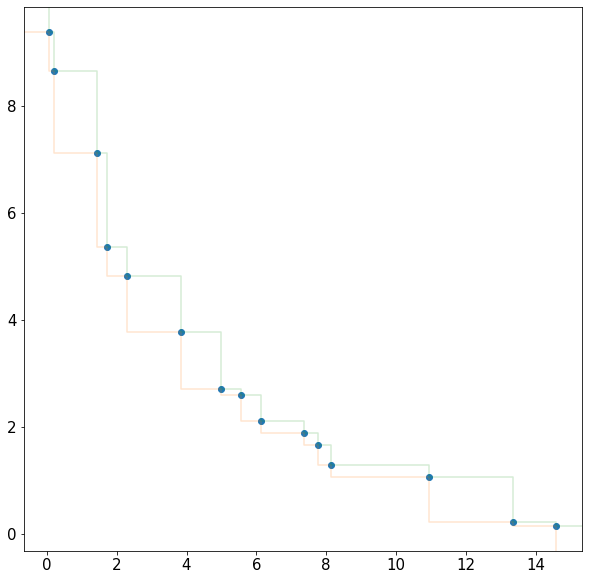

In [5]:
np.random.seed(5)
radius = 10
scaling = [1.5, 1.]
points = gen_mock_objective_queries(radius, [radius, radius], 150, scaling)
points.shape
p_points = Pareto_split(points)[0][:15]

fig = plt.figure(figsize=[10,10])
ax = fig.gca()

ax.scatter(*p_points.T, c="C0", )
attainment_front = gen_attainment_front_with_axis(ax, p_points, minimise=False)
ax.plot(*attainment_front.T, c="C1", alpha=0.2, markersize=20)
attainment_front = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*attainment_front.T, c="C2", alpha=0.2, markersize=20)

In [6]:
np.random.seed(5)
radius = 10
scaling = [1.5, 1.]
points = gen_mock_objective_queries(radius, [radius, radius], 150, scaling)
points.shape

(150, 2)

In [7]:
front_points_x = np.linspace(0, radius, 400)
front_points_x *= -1 
front_points_y = np.sqrt(radius**2-front_points_x**2)*-1
front_points_y += radius
front_points_x += radius
front_points_x *= scaling[0]
front_points_y *= scaling[1]

front_points = np.vstack((front_points_x, front_points_y)).T

In [8]:
t = np.array([[8.13245663],[1.29136977]]).T

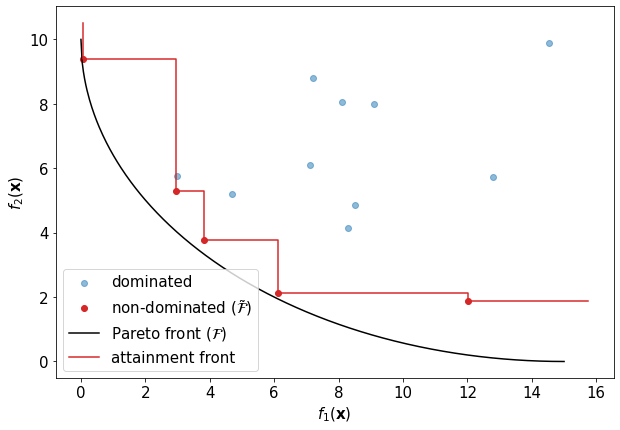

In [9]:
n_p = 15
p_points, d_points = Pareto_split(points[:n_p])
fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")

save_fig(fig, name="figure20_basic_Pareto_front")

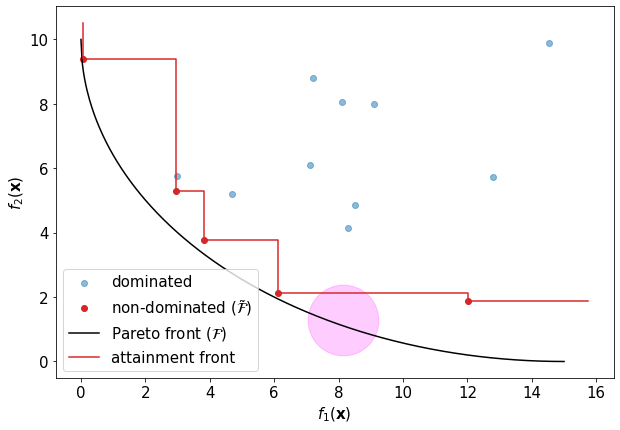

In [10]:
p_points, d_points = Pareto_split(points[:15])

fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*t.T, c="magenta", alpha=0.2, s= 5000)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")


save_fig(fig, name="figure21_directed_pareto_front")

In [11]:
STD =1
def gen_more_targetted(n, t):
    return np.random.randn(int(n), 2)*STD+t
    
    
def generate_targetted(t, n, p):
    
    points = np.zeros((n, 2))
    n_found = 0
    while n_found<n:
        new_points = gen_more_targetted(n/2, t)
        new_points = new_points[dominates(p, new_points)]
        try:
            points[n_found:n_found+new_points.shape[0]] = new_points
        except ValueError:
            points[n_found:] = new_points[:n-n_found]
        n_found += new_points.shape[0]
    
    return points 

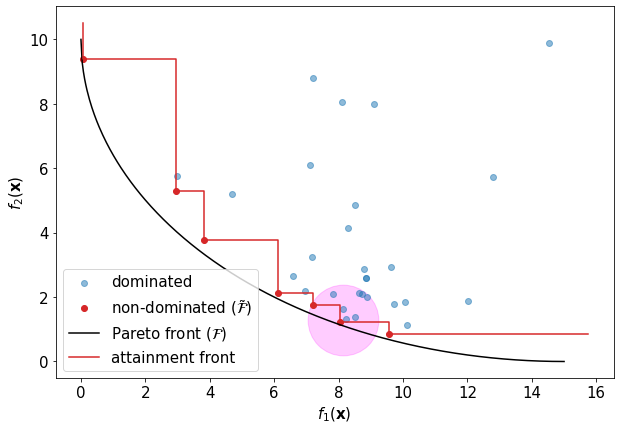

In [12]:
t_points = points[:15]
extra_points = generate_targetted(t*1.0, 20, front_points)
t_points = np.vstack((t_points, extra_points))
p_points, d_points =Pareto_split(t_points)

fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*t.T, c="magenta", alpha=0.2, s= 5000)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")


save_fig(fig, name="figure22_directed_pareto_front_2")

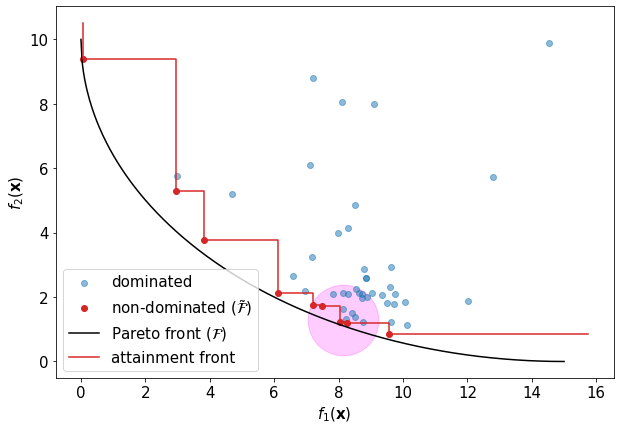

In [13]:
extra_points = generate_targetted(t*1.0, 15, front_points)
t_points = np.vstack((t_points, extra_points))
p_points, d_points =Pareto_split(t_points)

fig = plt.figure()
ax = fig.gca()
# p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
ax.scatter(*t.T, c="magenta", alpha=0.2, s= 5000)
ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
ax.plot(*gps.T, c="C3", label=r"attainment front")

ax.axis('scaled')
ax.legend(loc='lower left')

ax.set_xlabel("$f_1(\mathbf{x})$")
ax.set_ylabel("$f_2(\mathbf{x})$")


save_fig(fig, name="figure23_directed_pareto_front_3")

In [14]:
# STD = 0.5
# extra_points = generate_targetted(t*0.9, 10, front_points)
# t_points = np.vstack((t_points, extra_points))
# p_points, d_points =Pareto_split(t_points)

# fig = plt.figure()
# ax = fig.gca()
# # p_line = gen_attainment_front_with_axis(ax, p_points[np.argsort(p_points[:,0])], minimise=True)
# ax.scatter(*t.T, c="magenta", alpha=0.2, s= 5000)
# ax.scatter(*d_points.T, c="C0", alpha=0.5, label='dominated')
# ax.scatter(*p_points.T, c="C3", alpha=1., label=r'non-dominated ($\tilde{\mathcal{F}}$)')
# ax.plot(front_points[:,0], front_points[:,1], c="k", label="Pareto front ($\mathcal{F}$)")
# gps = gen_attainment_front_with_axis(ax, p_points, minimise=True)
# ax.plot(*gps.T, c="C3", label=r"attainment front")

# ax.axis('scaled')
# ax.legend(loc='lower left')

# ax.set_xlabel("$f_1(\mathbf{x})$")
# ax.set_ylabel("$f_2(\mathbf{x})$")


# save_fig(fig, name="figure24_directed_pareto_front_4")